In [1]:
import pandas as pd
from glob import glob

import numpy as np
import plotly.express as pe
import plotly.io as pio
from IPython.display import Markdown
width = 1000
pio.renderers.default = "plotly_mimetype+notebook_connected"

# Load data

In [2]:
url_data = "https://github.com/jupyterhub/binder-data/raw/master/billing/data/proc/data.json"
data = pd.read_json(url_data, orient='split')
data['date'] = pd.to_datetime(data['date'])

# Add information about number of launches on each day
launches = pd.read_html("https://archive.analytics.mybinder.org/")[0]
launches['Date'] = pd.to_datetime(launches['Date'])

In [3]:
template = 'plotly_white'

In [4]:
start_date = data['date'].min()
end_date = data['date'].max()
Markdown(f"**Showing data from {start_date:%Y-%m-%d} to {end_date:%Y-%m-%d}**")

**Showing data from 2017-12-13 to 2019-10-15**

# Cost by day

In [5]:
costs = data.groupby(['project_id', 'date']).sum()['cost']
costs = costs.reset_index()
weekly_costs = costs.groupby("project_id").resample("w", on="date").sum().reset_index()

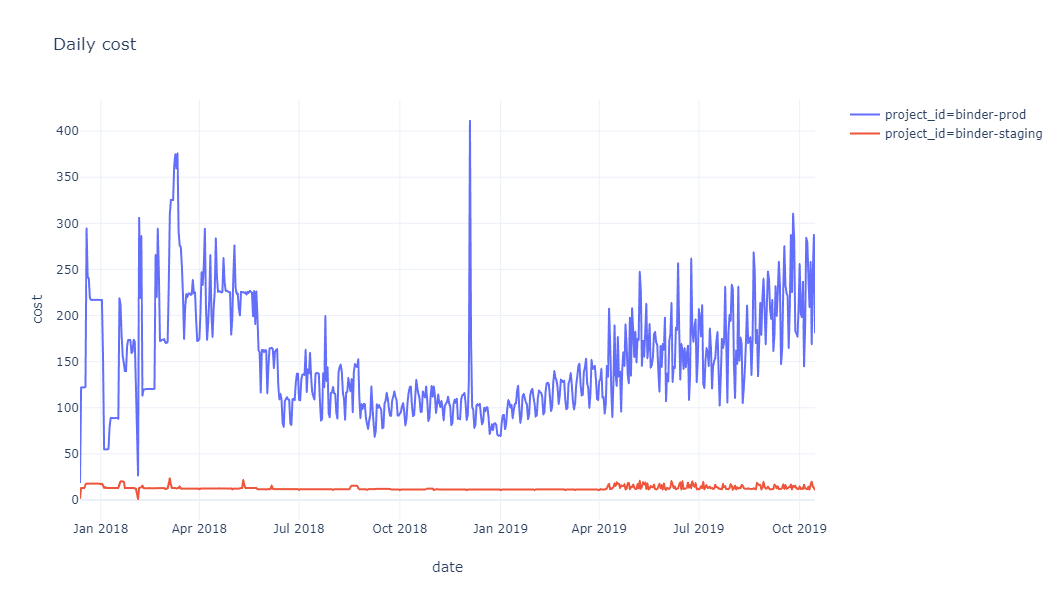

In [6]:
pe.line(costs.reset_index(), x='date', y='cost', color='project_id',
        width=width, template=template, title="Daily cost")

# Costs by week

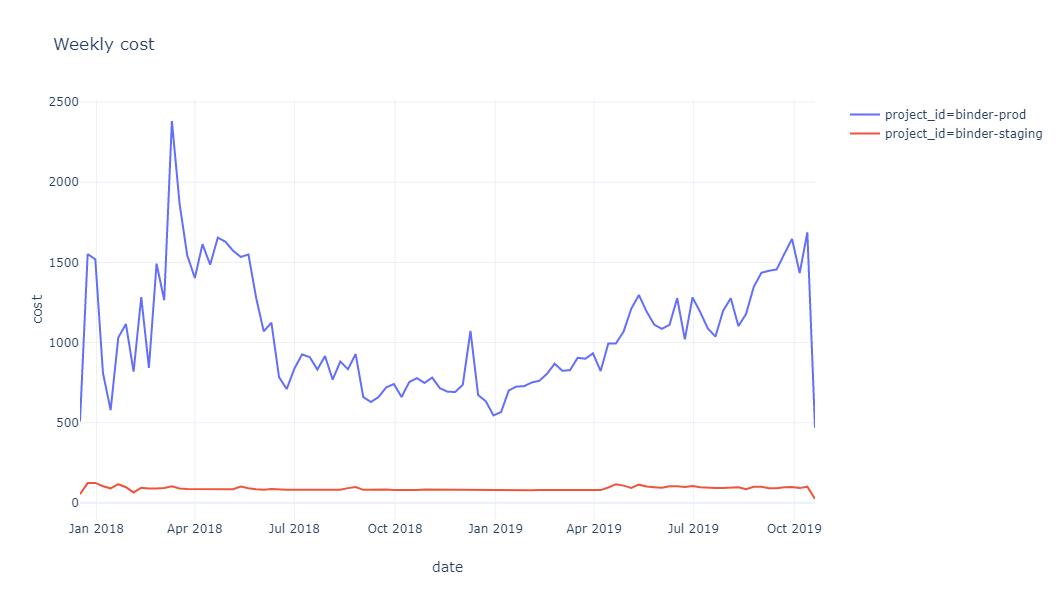

In [7]:
pe.line(weekly_costs, x='date', y='cost', color='project_id',
        width=width, template=template, title="Weekly cost")


# Plot by category

In [8]:
categories = data.groupby(['date', 'category', 'line_item']).sum()['cost'].reset_index()
categories = categories.groupby(['date', 'category']).sum().reset_index()

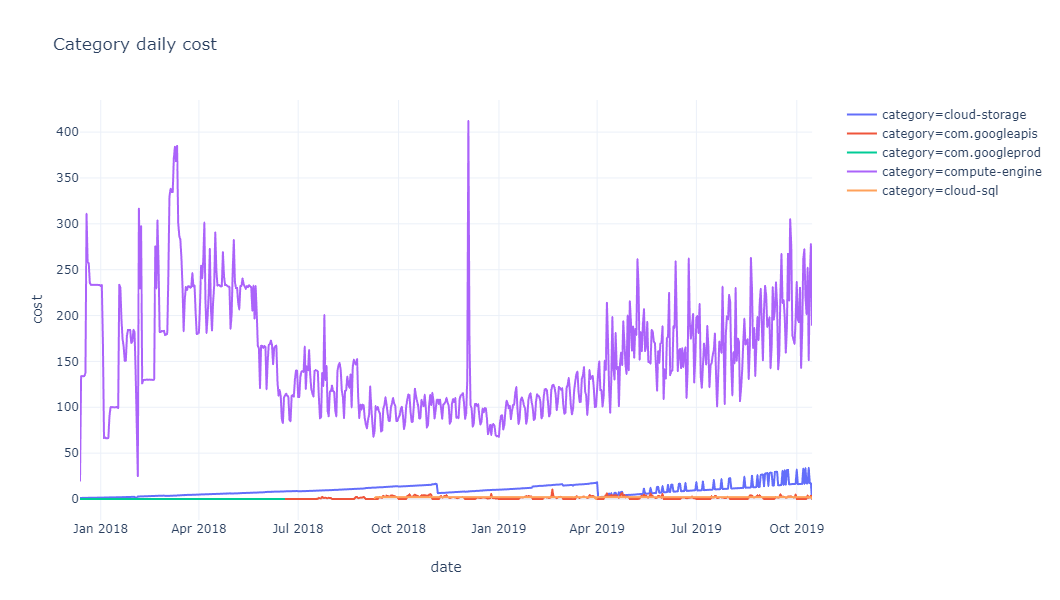

In [9]:
pe.line(categories, x='date', y='cost', color='category',
        width=width, template=template, title="Category daily cost")

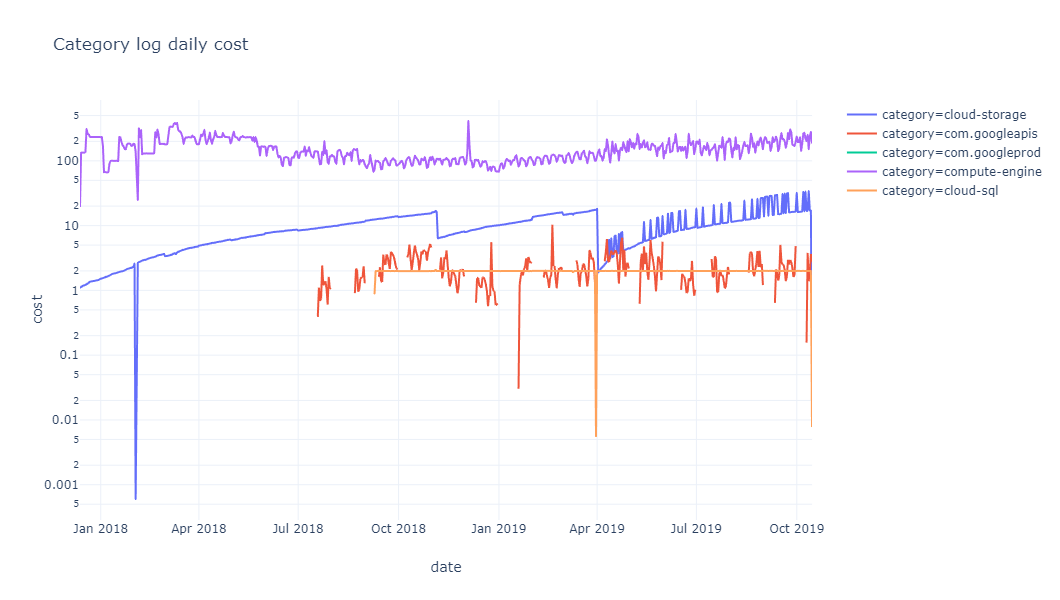

In [10]:
pe.line(categories, x='date', y='cost', color='category',
        width=width, template=template, title="Category log daily cost", log_y=True)

## Daily cost per session

In [11]:
daily = categories.groupby('date').agg({'cost': 'sum'})

# Merge them together
daily = pd.merge(daily, launches, left_on='date', right_on='Date', how='outer').dropna(subset=['Date'])
daily['cost_per_session'] = daily['cost'] / daily['Number of Events']

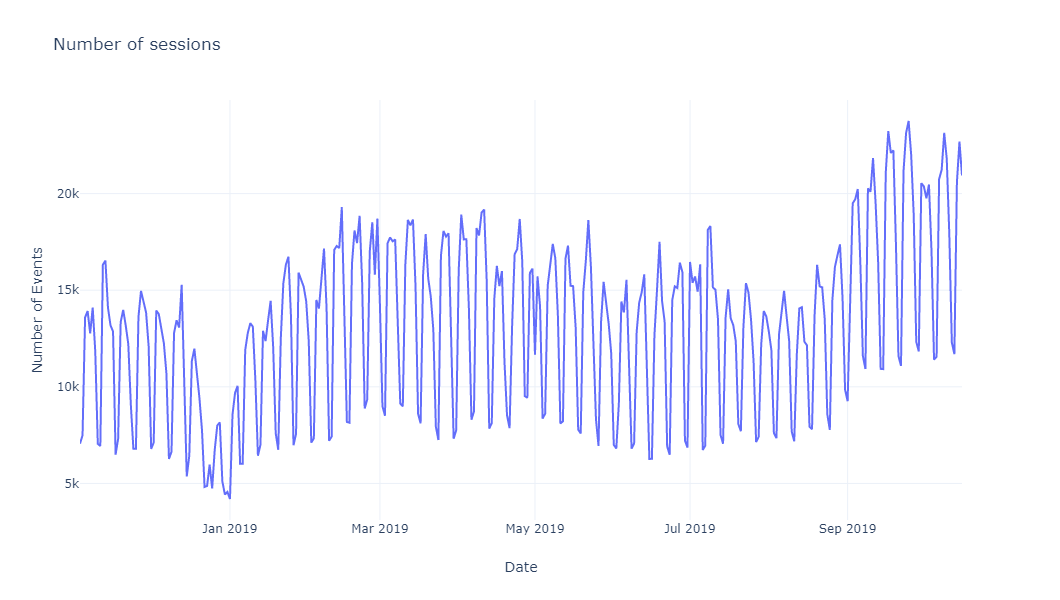

In [12]:
pe.line(daily, x='Date', y='Number of Events', template=template, title="Number of sessions")

In [13]:
weekly = daily.rolling(7, on='Date').mean()

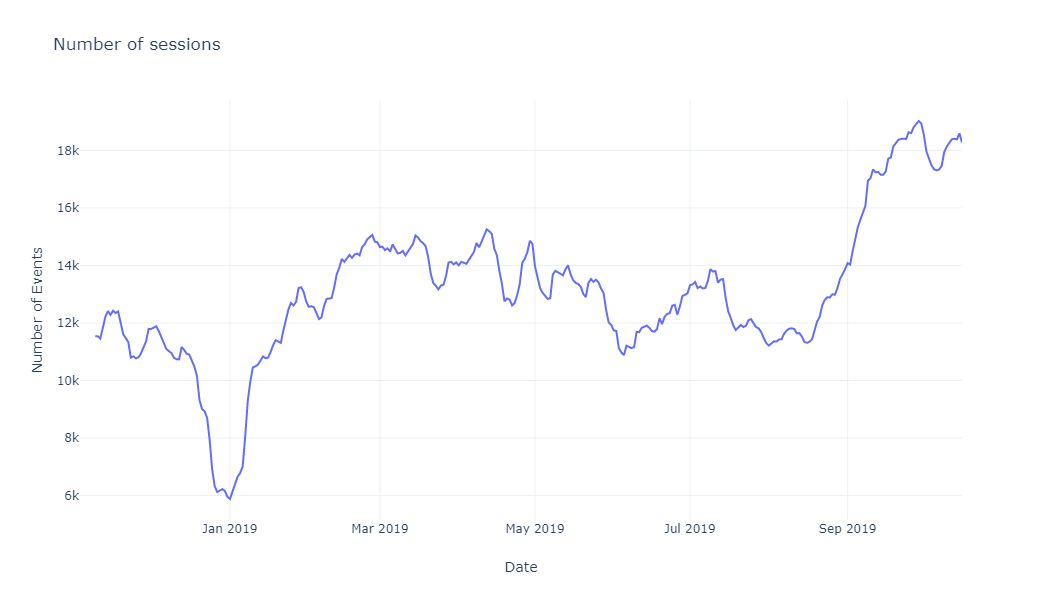

In [14]:
pe.line(weekly, x='Date', y='Number of Events', template=template, title="Number of sessions")

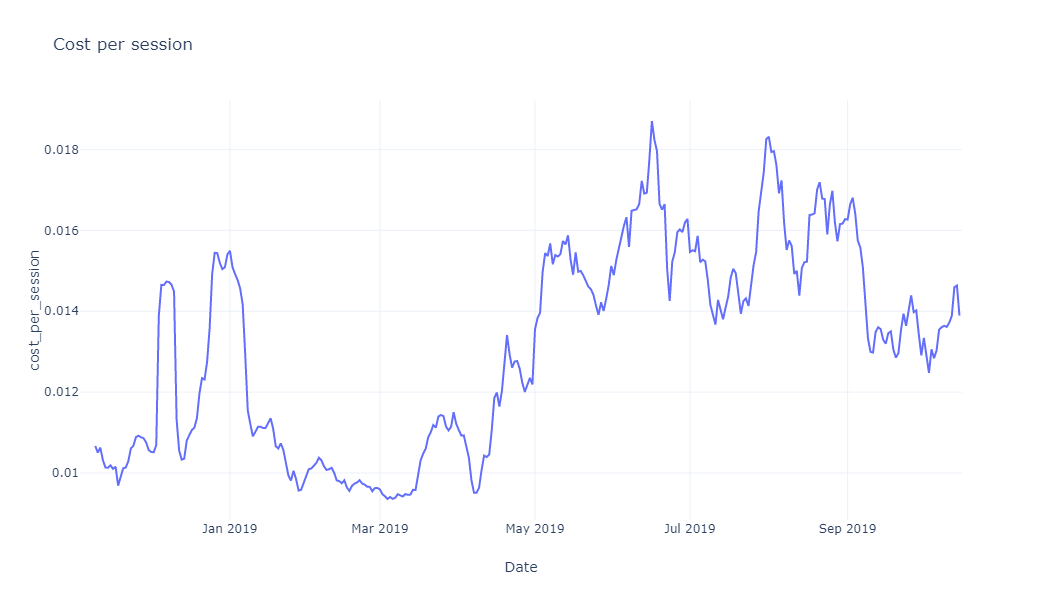

In [15]:
pe.line(weekly, x='Date', y='cost_per_session', template=template, title="Cost per session")

# Costs by month

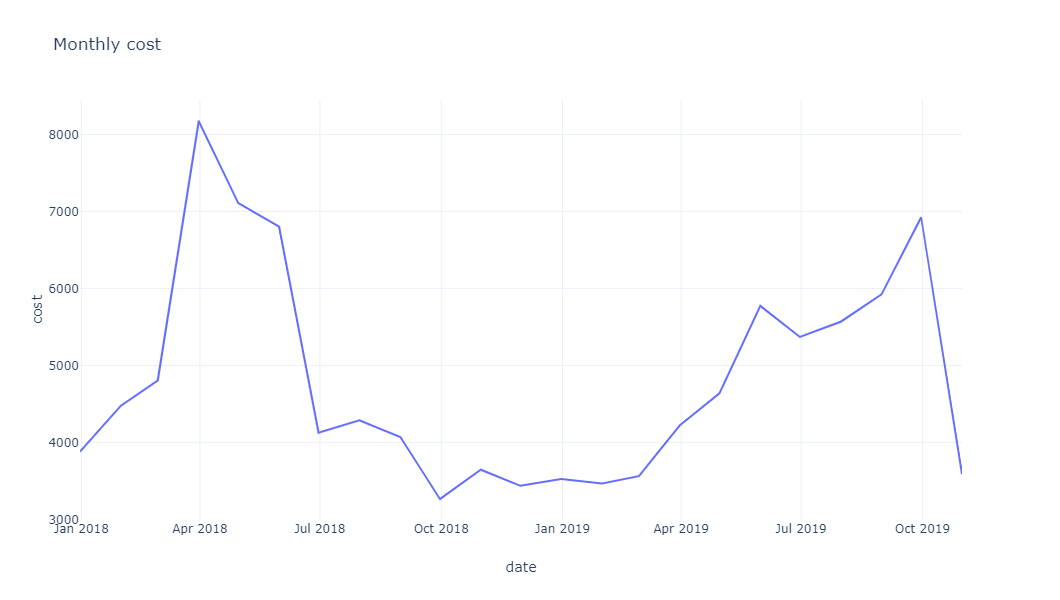

In [16]:
monthly = categories.resample('M', on='date').agg({'cost': 'sum'}).reset_index()
pe.line(monthly, x='date', y='cost', template=template, title="Monthly cost")